In [316]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

data = pd.read_csv("C:/Users/Admin/OneDrive/Desktop/3rd Year Project/performance.csv")
df=pd.DataFrame(data)

print(df)

df.isnull().sum()

      percentage educational_resources parents_education  personality passion  \
0           85.0                  good          graduate  extroverted     yes   
1           78.0          satisfactory     undergraduate   ambiverted      no   
2           92.0                  poor               PhD  introverted     yes   
3           87.0                  good          graduate  extroverted      no   
4           80.0          satisfactory     undergraduate   ambiverted     yes   
...          ...                   ...               ...          ...     ...   
997         73.0          satisfactory                12  extroverted     yes   
998         89.0          satisfactory           below10  introverted      no   
999         82.0                  good          graduate   ambiverted     yes   
1000        85.0                  good          graduate  extroverted     yes   
1001        78.0          satisfactory     undergraduate   ambiverted      no   

      ott_time  sm_time  tr

percentage               0
educational_resources    0
parents_education        0
personality              0
passion                  0
ott_time                 0
sm_time                  0
travel_time              0
eduvids_time             0
game_time                0
extra_time               0
ai_usage                 0
dtype: int64

In [317]:
null_values=df.isnull()
print(null_values)

total_null_values=df.isnull().sum()
print(total_null_values)


      percentage  educational_resources  parents_education  personality  \
0          False                  False              False        False   
1          False                  False              False        False   
2          False                  False              False        False   
3          False                  False              False        False   
4          False                  False              False        False   
...          ...                    ...                ...          ...   
997        False                  False              False        False   
998        False                  False              False        False   
999        False                  False              False        False   
1000       False                  False              False        False   
1001       False                  False              False        False   

      passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0       False     False  

In [318]:
# Map educational_resources values to numerical representations
# convert categorical variable to numerical
df['passion'] = df['passion'].apply(lambda x: 1 if x =='yes' else 0)
print(df)


      percentage educational_resources parents_education  personality  \
0           85.0                  good          graduate  extroverted   
1           78.0          satisfactory     undergraduate   ambiverted   
2           92.0                  poor               PhD  introverted   
3           87.0                  good          graduate  extroverted   
4           80.0          satisfactory     undergraduate   ambiverted   
...          ...                   ...               ...          ...   
997         73.0          satisfactory                12  extroverted   
998         89.0          satisfactory           below10  introverted   
999         82.0                  good          graduate   ambiverted   
1000        85.0                  good          graduate  extroverted   
1001        78.0          satisfactory     undergraduate   ambiverted   

      passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0           1       2.0      1.0          0.5    

In [319]:
mapping_dict1 = {'good': 1, 'poor': 0.01, 'satisfactory': 0.5}

# Apply the mapping to the DataFrame column
df['educational_resources'] = df['educational_resources'].map(mapping_dict1)


In [320]:
# Apply the mapping to the DataFrame column
mapping_dict2 = {'extroverted': 0.01, 'introverted': 1, 'ambiverted': 0.5}
df['personality'] = df['personality'].map(mapping_dict2)

In [321]:
mapping_dict3 = {'regular': 0.01, 'never': 1, 'occasional': 0.5}

# Apply the mapping to the DataFrame column
df['ai_usage'] = df['ai_usage'].map(mapping_dict3)

In [322]:
# Apply the mapping to the DataFrame column
mapping_dict4 = {'below10': 0.20, '10': 0.22, '12': 0.25, 'undergraduate': 0.5, 'graduate': 0.65, 'PhD': 0.75}
df['parents_education'] = df['parents_education'].map(mapping_dict4)


In [323]:
df['study_time'] = 9-df['ott_time']-df['sm_time']-df['travel_time']+df['eduvids_time']-df['game_time']-df['extra_time']

In [324]:
# Print the modified DataFrame
print(df)

      percentage  educational_resources  parents_education  personality  \
0           85.0                   1.00               0.65         0.01   
1           78.0                   0.50               0.50         0.50   
2           92.0                   0.01               0.75         1.00   
3           87.0                   1.00               0.65         0.01   
4           80.0                   0.50               0.50         0.50   
...          ...                    ...                ...          ...   
997         73.0                   0.50               0.25         0.01   
998         89.0                   0.50               0.20         1.00   
999         82.0                   1.00               0.65         0.50   
1000        85.0                   1.00               0.65         0.01   
1001        78.0                   0.50               0.50         0.50   

      passion  ott_time  sm_time  travel_time  eduvids_time  game_time  \
0           1       2.0  

array([[<Axes: title={'center': 'percentage'}>,
        <Axes: title={'center': 'educational_resources'}>],
       [<Axes: title={'center': 'parents_education'}>,
        <Axes: title={'center': 'passion'}>],
       [<Axes: title={'center': 'ai_usage'}>,
        <Axes: title={'center': 'study_time'}>]], dtype=object)

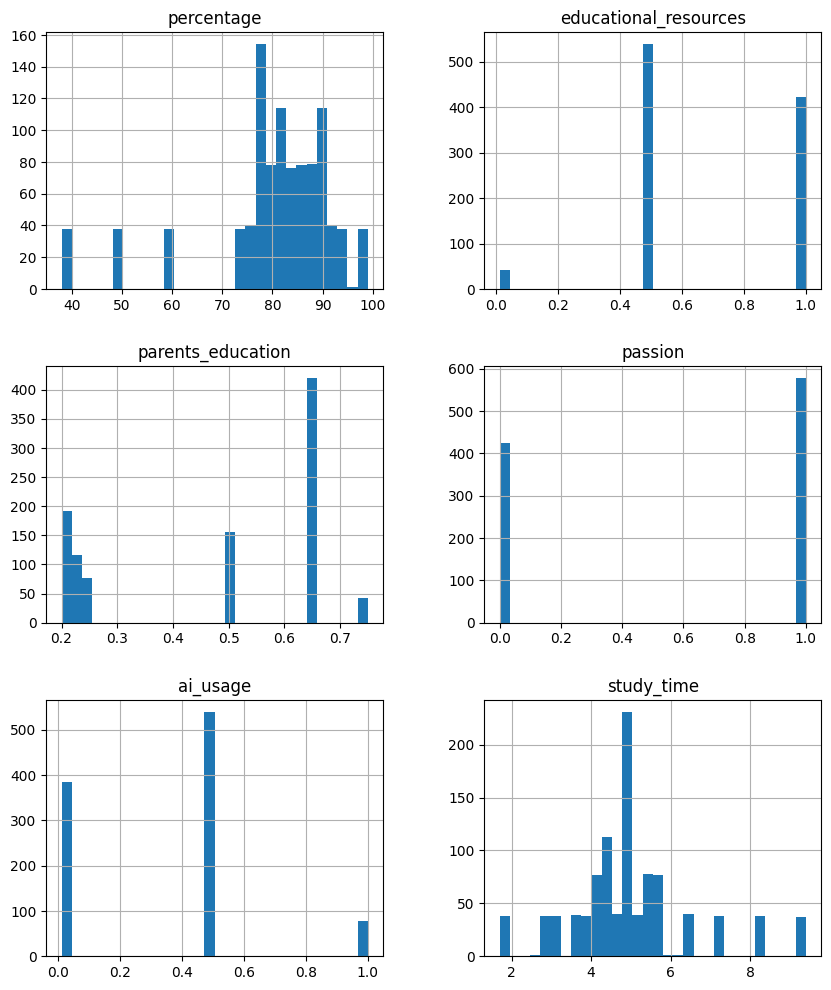

In [325]:
import matplotlib.pyplot as plt
df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']].hist(bins=30, figsize=(10,12))

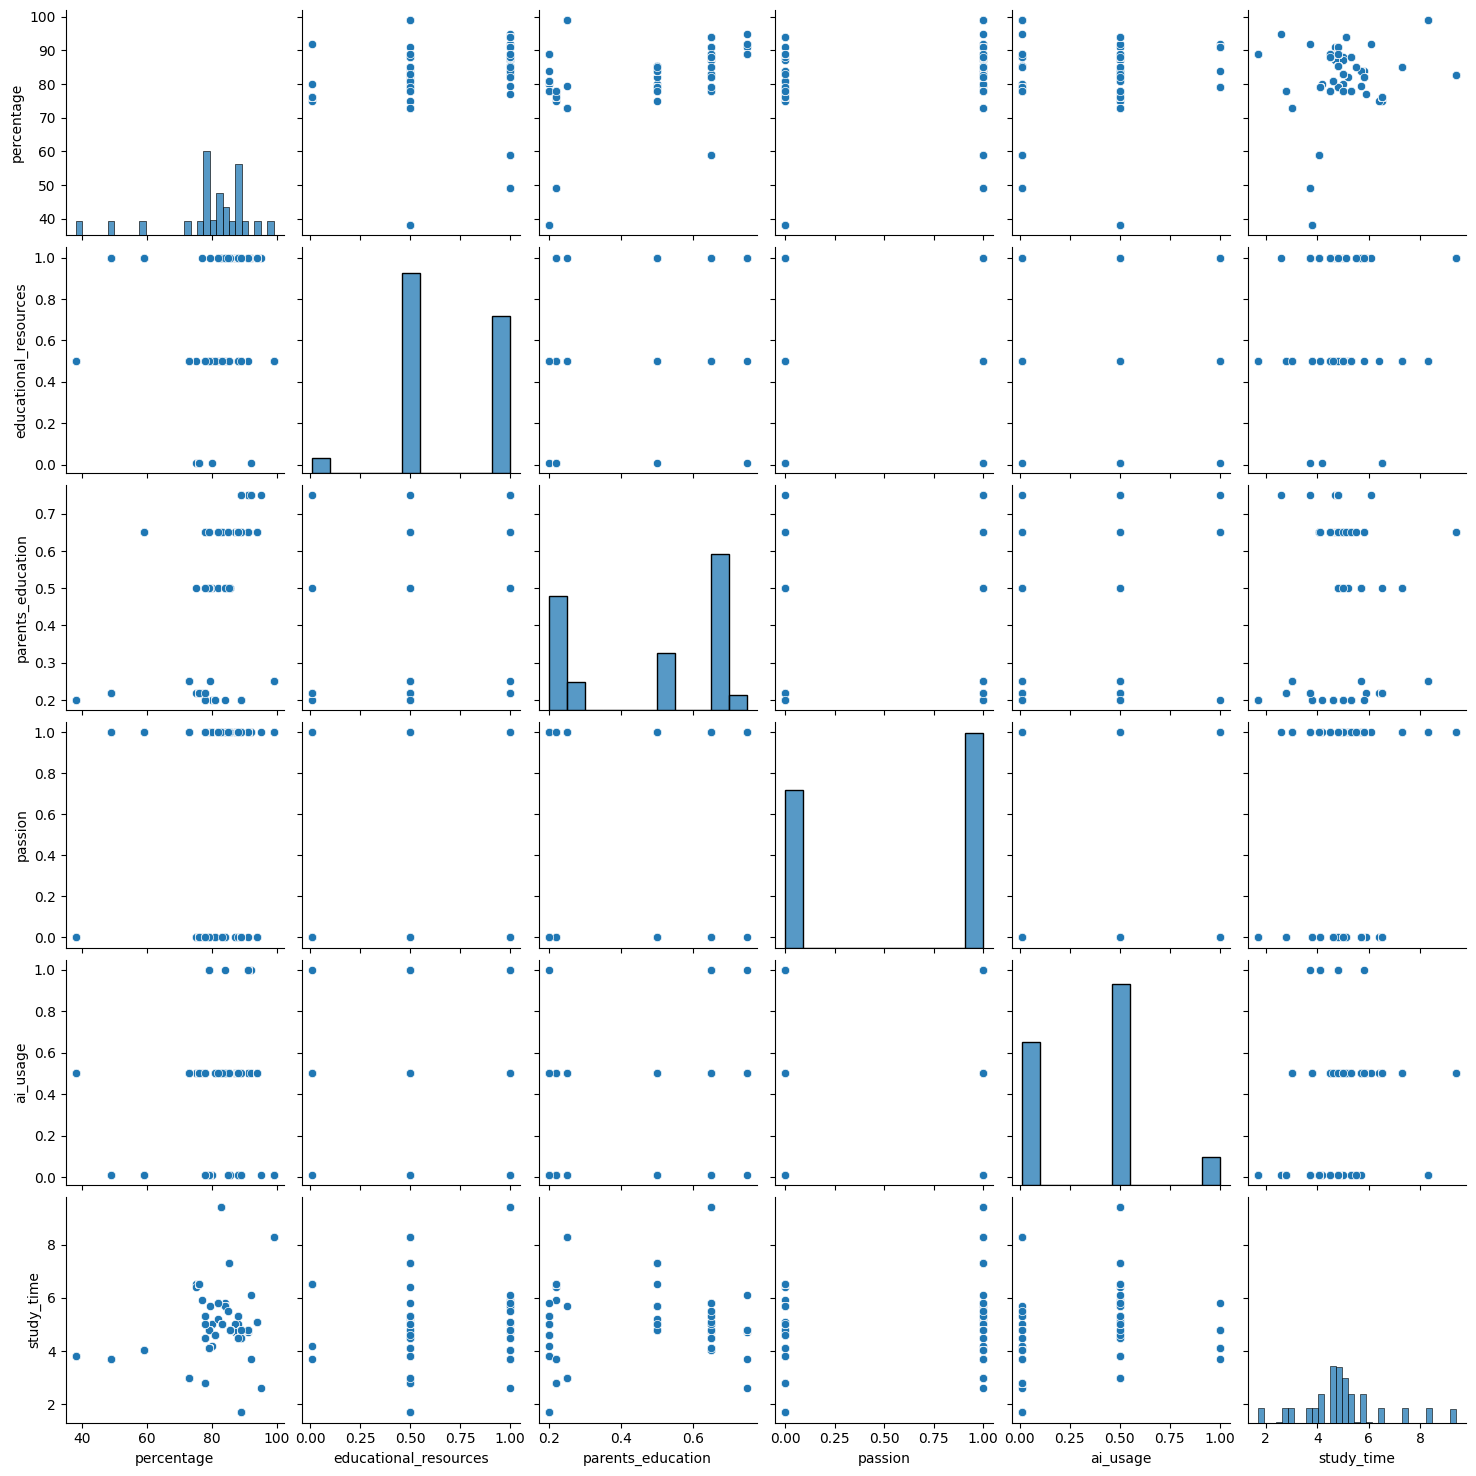

In [326]:
import seaborn as sns
# plot pairplot
sns.pairplot(df[  ['percentage', 'educational_resources', 'parents_education', 'passion', 'ai_usage', 'study_time']])

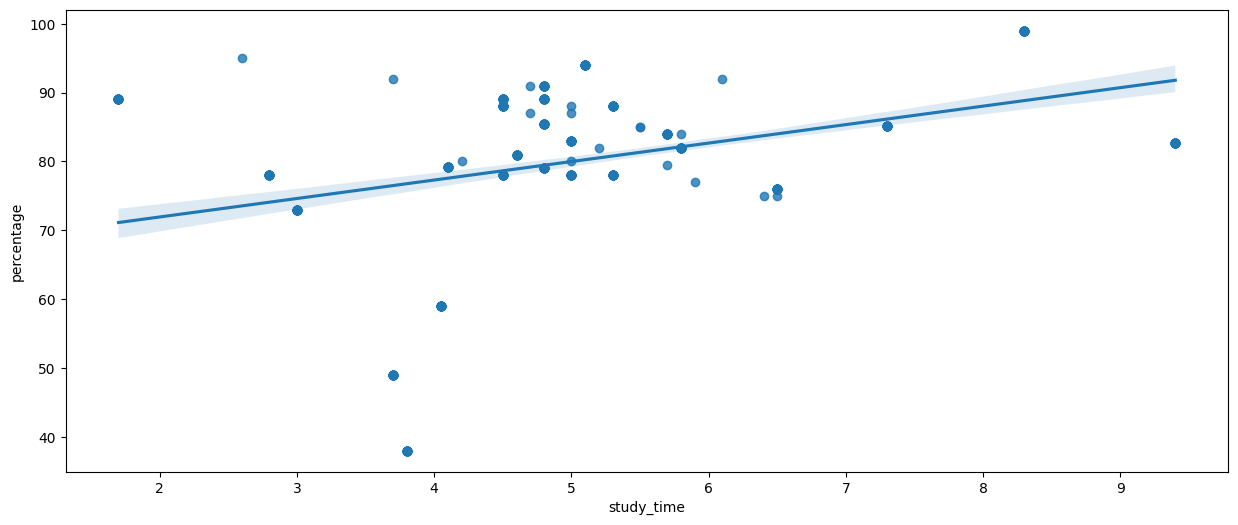

In [327]:
#regplot=regression plotting
plt.figure(figsize = (15, 6))
sns.regplot(x = 'study_time', y = 'percentage', data = df)
plt.show()

In [328]:
df.corr()

,percentage,educational_resources,parents_education,personality,passion,ott_time,sm_time,travel_time,eduvids_time,game_time,extra_time,ai_usage,study_time
percentage,1.000000,0.098230,0.369858,-0.059293,0.115031,-0.049495,-0.100840,-0.289754,0.568893,-0.069143,0.289367,0.074455,0.324727
educational_resources,0.098230,1.000000,0.548574,0.252027,0.443113,0.343484,-0.353541,-0.453805,-0.006730,-0.255769,0.333722,-0.114371,0.040314
parents_education,0.369858,0.548574,1.000000,0.385703,0.341739,0.265529,-0.420271,-0.609030,0.303590,0.014713,0.353464,0.295900,0.211627
personality,-0.059293,0.252027,0.385703,1.000000,0.310980,-0.303182,0.184206,-0.235958,-0.112898,0.168160,0.054806,0.157346,-0.002170
passion,0.115031,0.443113,0.341739,0.310980,1.000000,0.109569,-0.113343,-0.345189,0.104740,-0.273914,-0.095201,-0.183936,0.267258
ott_time,-0.049495,0.343484,0.265529,-0.303182,0.109569,1.000000,-0.552878,-0.279087,-0.206298,-0.308055,0.415463,0.050881,-0.355674
sm_time,-0.100840,-0.353541,-0.420271,0.184206,-0.113343,-0.552878,1.000000,0.420369,-0.154258,0.009189,-0.288266,-0.074066,-0.235425
travel_time,-0.289754,-0.453805,-0.609030,-0.235958,-0.345189,-0.279087,0.420369,1.000000,-0.134517,0.131461,-0.294157,-0.200764,-0.296871
eduvids_time,0.568893,-0.006730,0.303590,-0.112898,0.104740,-0.206298,-0.154258,-0.134517,1.000000,-0.178889,0.031643,0.141645,0.742578
game_time,-0.069143,-0.255769,0.014713,0.168160,-0.273914,-0.308055,0.009189,0.131461,-0.178889,1.000000,0.025867,-0.073307,-0.298899


<Axes: >

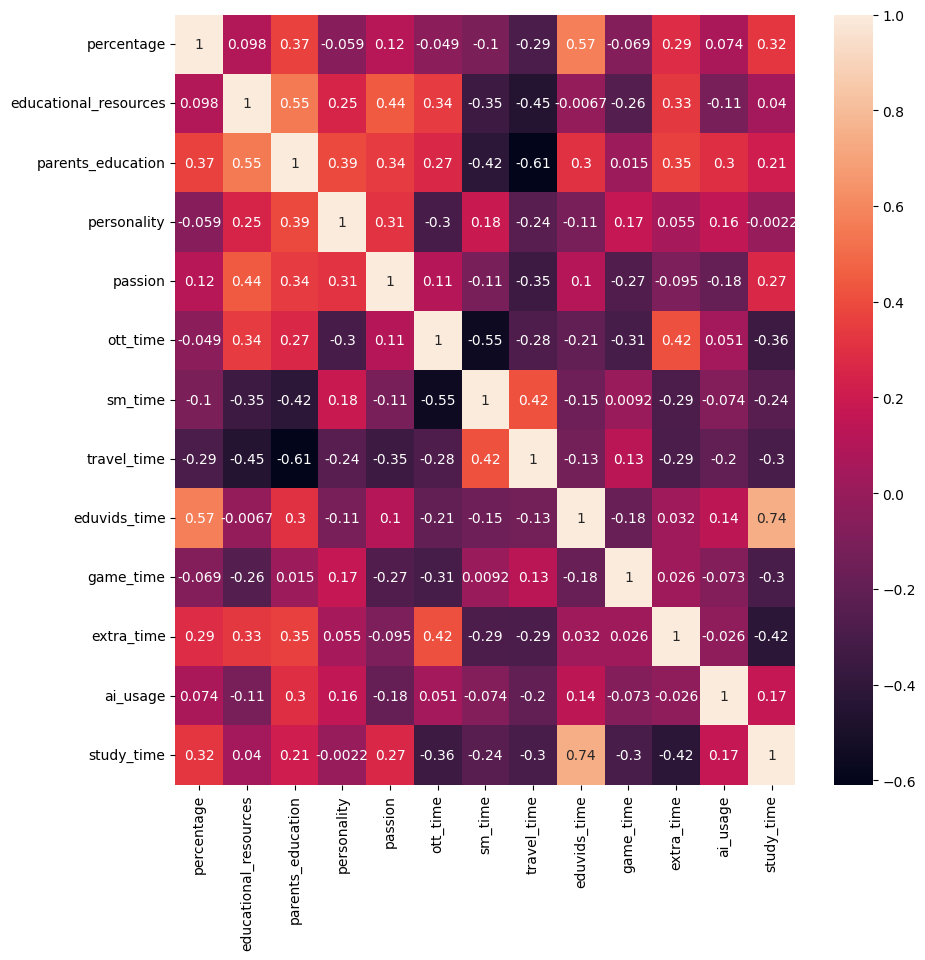

In [329]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [330]:
X.shape

y.shape

import numpy as np
#coverting in numpy array for ease to use
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

y = y.reshape(-1,1)

X
y.shape

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.9, random_state=10)

print(X_train.shape)
print(X_test.shape)

df

(100, 12)
(902, 12)


,percentage,educational_resources,parents_education,personality,passion,ott_time,sm_time,travel_time,eduvids_time,game_time,extra_time,ai_usage,study_time
0,85.0,1.00,0.65,0.01,1,2.0,1.0,0.5,3.0,1.0,2.0,0.01,5.5
1,78.0,0.50,0.50,0.50,0,1.5,1.5,1.0,2.5,1.5,1.0,0.50,5.0
2,92.0,0.01,0.75,1.00,1,3.0,0.5,0.3,2.0,0.5,3.0,1.00,3.7
3,87.0,1.00,0.65,0.01,0,2.0,1.0,0.8,2.5,1.0,2.0,0.50,4.7
4,80.0,0.50,0.50,0.50,1,2.5,1.0,0.5,2.0,1.0,1.0,0.01,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,73.0,0.50,0.25,0.01,1,3.2,2.0,1.0,1.3,0.1,1.0,0.50,3.0
998,89.0,0.50,0.20,1.00,0,1.3,3.6,1.5,1.5,1.1,1.3,0.01,1.7
999,82.0,1.00,0.65,0.50,1,3.0,1.2,1.0,2.2,0.1,0.1,0.50,5.8
1000,85.0,1.00,0.65,0.01,1,2.0,1.0,0.5,3.0,1.0,2.0,0.01,5.5


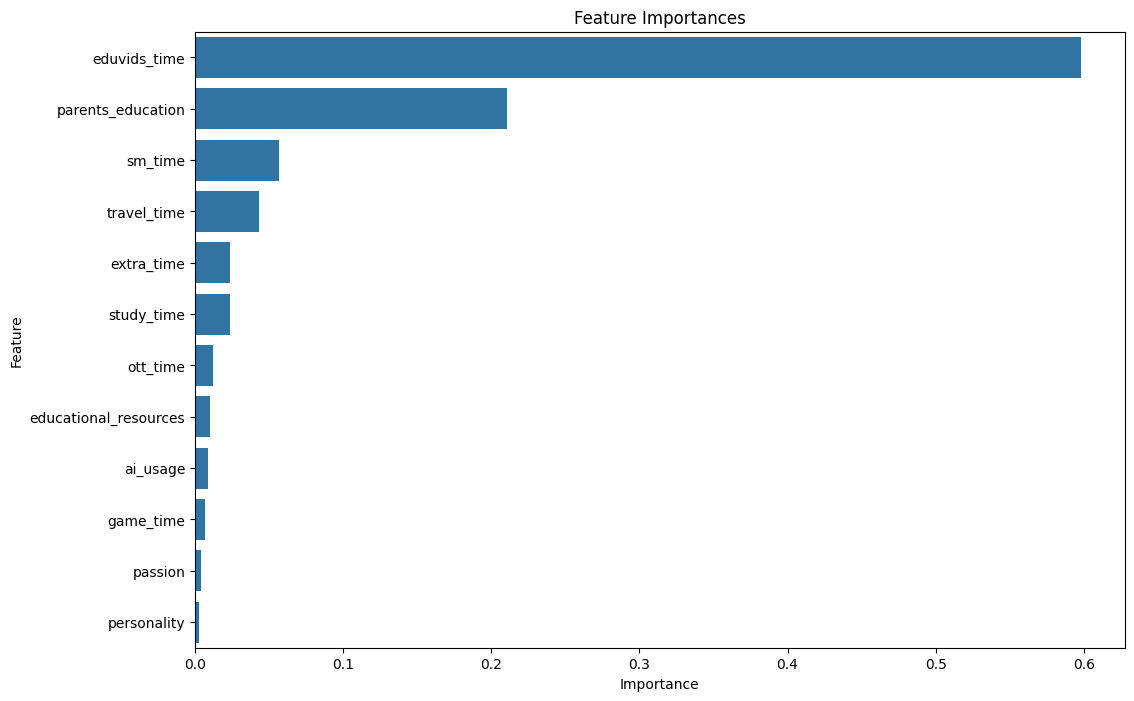

In [331]:
# Get feature importances from the trained model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': df.drop(columns=['percentage']).columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [332]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pickle
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

# Initialize the random forest regressor
rf_model = RandomForestRegressor()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)
best_rf_model.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('C:/Users/Admin/OneDrive/Desktop/3rd Year Project/random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

# Load the trained model from the file (for deployment)
with open('C:/Users/Admin/OneDrive/Desktop/3rd Year Project/random_forest_model.pkl', 'rb') as model_file:
    deployed_model = pickle.load(model_file)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 3.6226220408950707
R-squared Score: 0.97680380745441


In [333]:
y_train.shape

(601, 1)

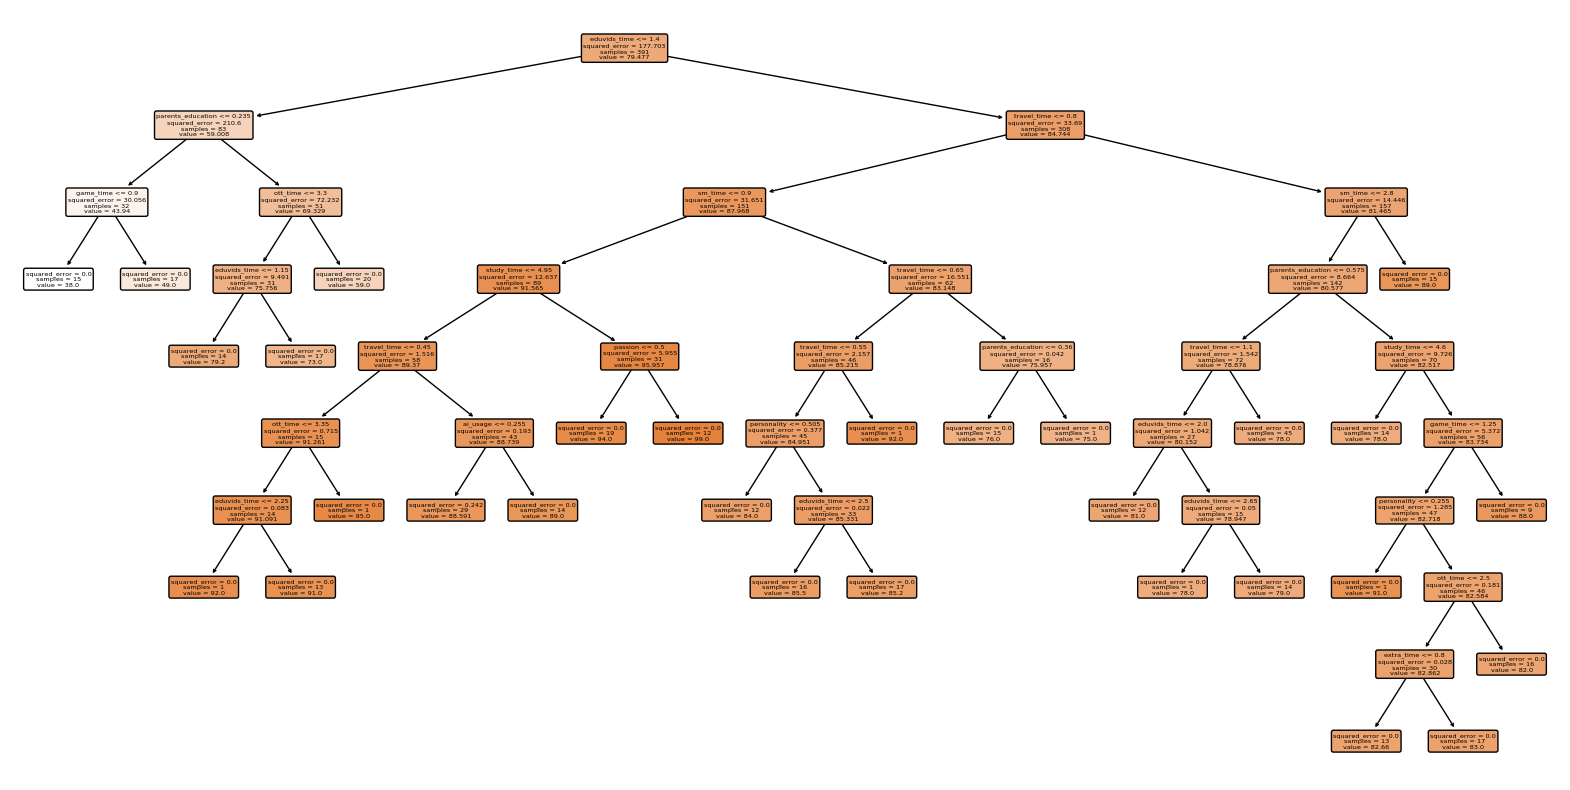

In [334]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the first tree in the random forest (you can choose any tree index)
plt.figure(figsize=(20, 10))
plot_tree(best_rf_model.estimators_[0], feature_names=df.drop(columns=['percentage']).columns, filled=True, rounded=True)
plt.show()

In [335]:
y_pred.shape

(401,)

In [336]:
y_pred.shape


(401,)

In [337]:
print(y_pred)


[81.         78.         88.         83.         92.60072381 82.66000366
 99.         78.         82.66000366 78.         76.         85.5
 82.66000366 81.         99.         76.         89.         88.5370489
 81.         78.         78.         88.         85.5        89.
 78.         79.         81.         99.         78.         78.
 79.         89.         88.5370489  78.         88.5370489  76.
 85.5        89.         49.         78.         79.         73.
 91.         59.         94.         85.19999695 82.66000366 82.89559998
 83.         88.5370489  83.         88.5370489  59.         59.
 38.         83.         83.         73.         78.         59.
 84.01142857 81.         88.         84.01142857 82.         94.
 91.         79.19999695 91.         79.         94.         85.5
 91.         94.         78.         81.         83.         88.5370489
 82.         89.         88.         78.         79.         81.
 38.         82.66000366 85.5        88.5370489  88.537048

In [338]:
# Create a DataFrame
df = pd.DataFrame({'predicted_score': y_pred})
# Save to a CSV file
df.to_csv('performance.csv', index=False)



In [339]:
# Create a DataFrame with the predicted scores
recommendation_df = pd.DataFrame({'predicted_score': y_pred})


# Define a threshold for recommendations
threshold = 80

# Create a new column 'recommendation' based on the threshold
recommendation_df['recommendation'] = recommendation_df['predicted_score'].apply(lambda x: 'High' if x >= threshold else 'Low')

# Display the recommendation DataFrame
print(recommendation_df.head())

# Save the recommendation DataFrame to a new CSV file
recommendation_df.to_csv('performance.csv', index=False)
print("Recommendations saved to 'performance.csv'")

   predicted_score recommendation
0        81.000000           High
1        78.000000            Low
2        88.000000           High
3        83.000000           High
4        92.600724           High
Recommendations saved to 'performance.csv'
